# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

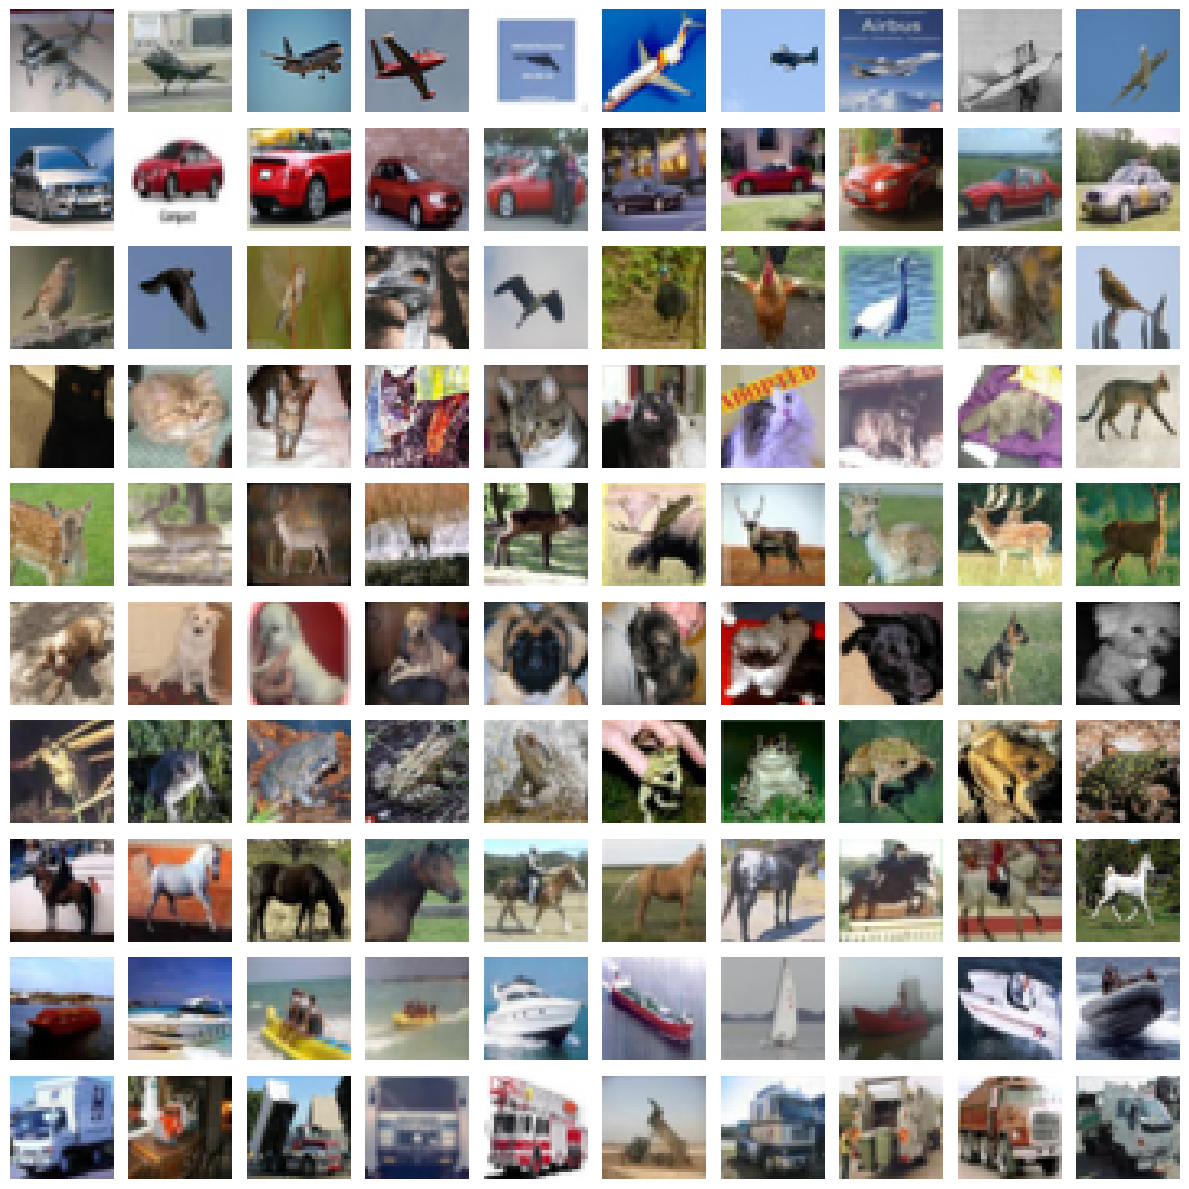

In [2]:

# Class names for CIFAR-10
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# 1. Visualize the images in a 10 x 10 plot showing 10 random samples from each class
num_classes = 10
samples_per_class = 10

plt.figure(figsize=(12, 12))

for class_idx in range(num_classes):
    # Get all indexes where label == class_idx
    idxs = np.where(y_train.flatten() == class_idx)[0]
    # Pick 10 random indexes
    rand_idxs = np.random.choice(idxs, samples_per_class, replace=False)
    # Plot each sample
    for i, idx in enumerate(rand_idxs):
        plt.subplot(num_classes, samples_per_class, class_idx*samples_per_class + i + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
        # Only add the class label on the left edge
        if i == 0:
            plt.ylabel(classes[class_idx], fontsize=10)

plt.tight_layout()
plt.show()


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)
# Convert from int to float and scale pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session
clear_session()  # Just to clear any existing model from memory
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # 10 classes


c:\Users\pbele\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=50,
    batch_size=512
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.1473 - loss: 2.2769 - val_accuracy: 0.2328 - val_loss: 2.2074
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.2380 - loss: 2.1766 - val_accuracy: 0.2742 - val_loss: 2.0831
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.2816 - loss: 2.0532 - val_accuracy: 0.2998 - val_loss: 1.9925
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3129 - loss: 1.9696 - val_accuracy: 0.3201 - val_loss: 1.9253
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3320 - loss: 1.9163 - val_accuracy: 0.3527 - val_loss: 1.8881
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3471 - loss: 1.8834 - val_accuracy: 0.3607 - val_loss: 1.8536
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.3597 - loss: 1.8492 - val_accuracy: 0.3583 - val_loss: 1.8300
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.3701 - loss: 1.8228 - val_accuracy: 0.3583 -

*   Plot the cross entropy loss curve and the accuracy curve

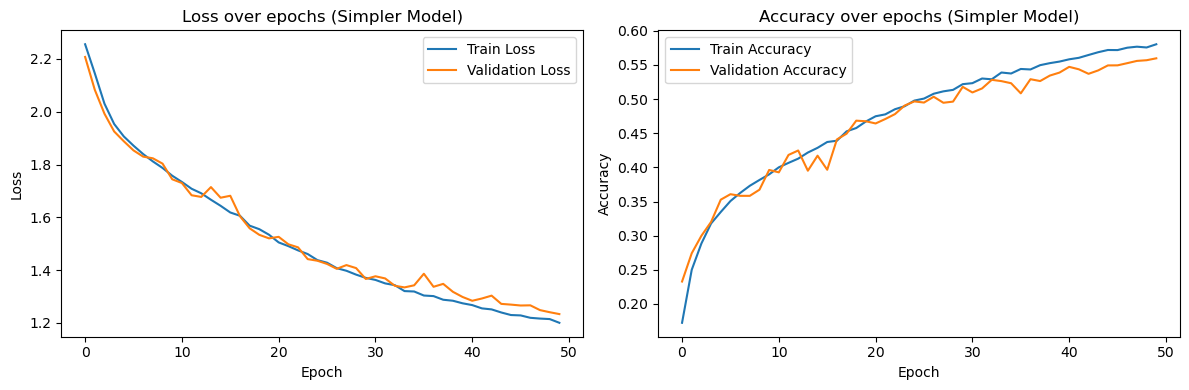

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs (Simpler Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs (Simpler Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:

from keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session()

model_vgg = Sequential()

# Block 1 (VGG-style):
model_vgg.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_vgg.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Fully Connected layers:
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile
from tensorflow.keras.optimizers import SGD

model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

# Train
history_vgg = model_vgg.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=50,
    batch_size=512
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 325ms/step - accuracy: 0.1564 - loss: 2.2774 - val_accuracy: 0.2399 - val_loss: 2.1677
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.2510 - loss: 2.1322 - val_accuracy: 0.2520 - val_loss: 2.0692
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.2905 - loss: 2.0135 - val_accuracy: 0.2959 - val_loss: 1.9852
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.3228 - loss: 1.9336 - val_accuracy: 0.3483 - val_loss: 1.8661
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.3460 - loss: 1.8752 - val_accuracy: 0.3596 - val_loss: 1.8426
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.3602 - loss: 1.8371 - val_accuracy: 0.3676 - val_loss: 1.7947
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.3828 - loss: 1.7836 - val_accuracy: 0.3715 - val_loss: 1.7725
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.3880 - loss: 1.7507 - val_accu

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

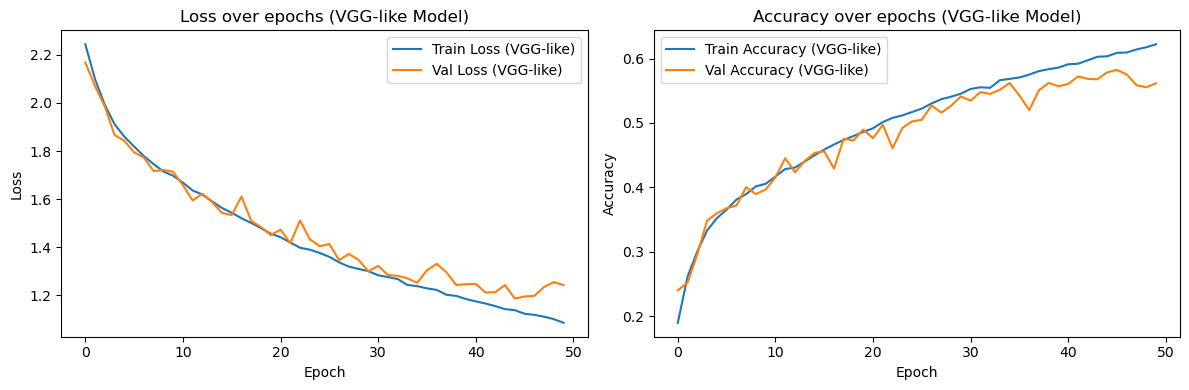

In [9]:

plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Train Loss (VGG-like)')
plt.plot(history_vgg.history['val_loss'], label='Val Loss (VGG-like)')
plt.title('Loss over epochs (VGG-like Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy (VGG-like)')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy (VGG-like)')
plt.title('Accuracy over epochs (VGG-like Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


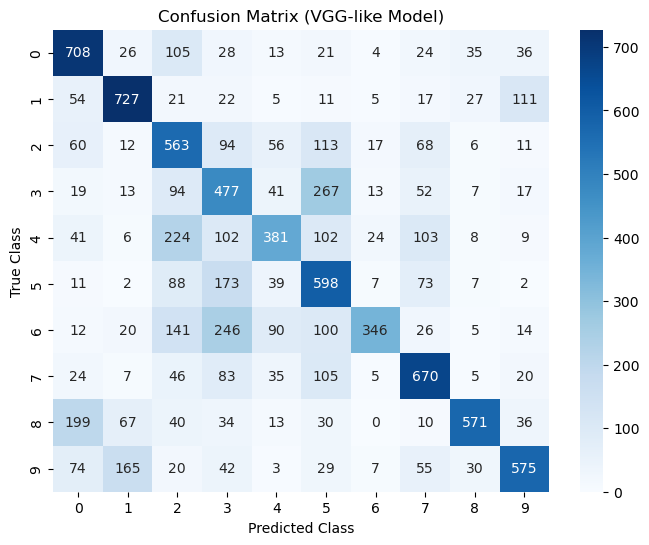

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions for the VGG-like model
y_pred_prob = model_vgg.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (VGG-like Model)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


**Comment on the observation**


The main diagonal generally has the highest counts, indicating that most samples are being correctly classified. For instance, Class 0 (airplane) has 708 correctly classified samples, Class 1 (automobile) has 727, etc.

Common Confusions

Airplane (0) is sometimes misclassified as bird (2) or ship (8). This could be due to similar backgrounds (sky for airplanes, maybe water/sky for ships or birds).
Automobile (1) is occasionally mistaken for truck (9), which is logical since both have four wheels and a similar shape.
Cat (3) and dog (5) show mutual confusion (cat images predicted as dog, and dog images predicted as cat). This is a classic challenge on CIFAR-10: both have four legs, furry appearance, etc.
Deer (4) and horse (7) also exhibit some confusion, possibly because of their four-legged, roughly similar silhouettes.
Frog (6) gets confused with cat (3) or bird (2) in some cases, which might be due to color or posture similarities in certain images.
Ship (8) is sometimes misclassified as airplane (0) or truck (9), especially if the shape in the image or background details resemble them.
Truck (9) is misclassified as automobile (1) in a significant number of cases, which again points to visual similarity among vehicle classes.
Possible Reasons for Confusion

Similar Visual Features: Classes with four legs (cat, dog, deer, horse) or vehicles with similar shapes (automobile, truck) can confuse the model if the images are not distinctive enough or if the background is not informative.
Low-Resolution Images: CIFAR-10 images are 32×32, so sometimes small distinguishing details are hard to capture.
Varied Poses: Animals can appear in many positions, making it difficult for the model to learn consistent features.
Performance Highlights

Despite these confusions, the model does well on the majority of images in each class (the diagonal sums are notably higher than off-diagonal).
Certain classes (e.g., automobile, truck) show more overlap, suggesting it might help to collect more varied training examples or use data augmentation that highlights differences (e.g., shape-based augmentations).
Overall, the confusion matrix shows that the VGG-like model has learned to classify most classes well, but struggles with visually similar or closely related classes. Further improvements (more layers, better hyperparameters, or advanced data augmentation) might reduce these specific confusions.


*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


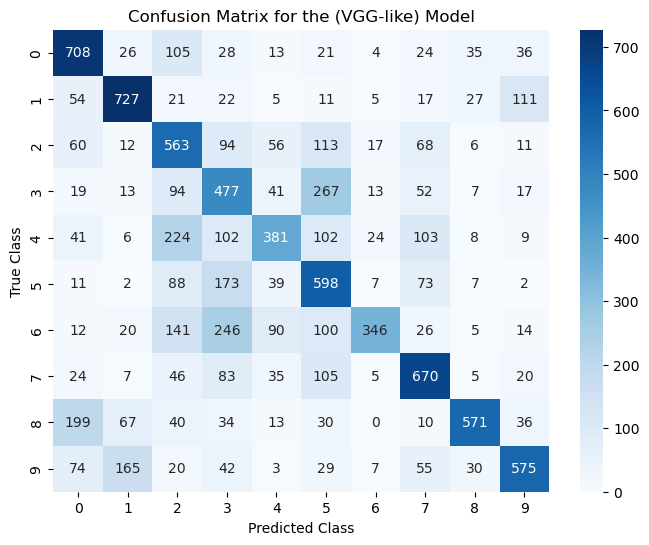

In [11]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example: using the model named 'model_vgg' that you trained previously
y_pred_prob = model_vgg.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for the (VGG-like) Model')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


**Comment here :**

The highest counts tend to be on the diagonal (e.g., Class 0: Airplane has 708 correct predictions, Class 1: Automobile has 727, and so on). This indicates the model is performing well overall, correctly classifying most images in each category.
Off-Diagonal Confusions

Airplane (0) is sometimes confused with bird (2) or ship (8). Images in the sky or involving water (ships) may share backgrounds that mislead the model.
Automobile (1) is occasionally predicted as truck (9)—both are vehicles with similar shapes and features, so mixing them is not uncommon.
Bird (2), cat (3), and dog (5) have noticeable confusion among each other. Animals in CIFAR-10 often have similar backgrounds or poses that can look alike at 32×32 resolution.
Deer (4) and horse (7) also share some overlap, likely due to both being four-legged, similarly sized animals.
Frog (6) is misclassified as cat (3) or bird (2) in some cases; perhaps because of color, shape, or background similarities in certain images.
Ship (8) sometimes gets mistaken for airplane (0) or truck (9), again pointing toward confusion over background context (sky/water vs. roads or freight).
Truck (9) is often confused with automobile (1) for the same reason as above: both are four-wheeled ground vehicles.
Possible Reasons

Similar Visual Features: For instance, cars and trucks share many features. Likewise, cats and dogs can appear quite alike in low-resolution images.
Complex or Confusing Backgrounds: CIFAR-10 images can have varied or cluttered backgrounds that obscure key features.
Image Resolution: 32×32 pixels can sometimes make it tough to distinguish fine-grained details between classes.
Overall Performance

Despite the confusions, each class is mostly correct (noticeably high diagonal values).
The model handles some classes better than others, and further improvements could come from additional data augmentation, more training epochs, or model tuning to reduce confusion among similar classes.







*    Print the test accuracy for the trained model.

In [13]:

test_loss, test_acc = model_vgg.evaluate(x_test, y_test_cat, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_acc*100))


Test Accuracy: 56.16%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [14]:
from keras.backend import clear_session
clear_session()

In [21]:
!pip install opencv-python
!pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.8 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.8 MB 10.5 MB/s eta 0:00:04
   ------- -------------------------------- 6.8/38.8 MB 11.3 MB/s eta 0:00:03
   --------- ------------------------------ 9.2/38.8 MB 11.4 MB/s eta 0:00:03
   ----------- ---------------------------- 11.3/38.8 MB 10.8 MB/s eta 0:00:03
   -------------- ------------------------- 13.6/38.8 MB 11.0 MB/s eta 0:00:03
   ---------------- ----------------------- 16.0/38.8 MB 11.1 MB/s eta 0:00:03
   ------------------- -------------------- 18.6/38.8 MB 11.1 MB/s eta 0:00:02
   -------------------- ------------------- 19.9/38.8 MB 11.1 MB/s eta 0:00:02
   ---------------------- ----------------- 21.5/38.8 MB 10.3 MB/s eta 0:00:02
   ------------------------ --------------- 23.3/38.8 MB 10.2 MB/s eta 0:00:02
   -------------------------- ------------- 25.7/38.8 MB 10.1 MB/

In [22]:

import cv2

# Resize the training and test images from 32x32 to 64x64
x_train_64 = np.array([cv2.resize(img, (64,64)) for img in x_train])
x_test_64  = np.array([cv2.resize(img, (64,64)) for img in x_test])

# Define the new VGG-style model
from keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

clear_session()  # Clear any previous model from memory

model_vgg_large = Sequential()

# Block 1: 2 conv layers of 64 filters
model_vgg_large.add(Conv2D(64, (3,3), padding='same', activation='relu', 
                           input_shape=(64,64,3)))
model_vgg_large.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_vgg_large.add(MaxPooling2D(pool_size=(2,2)))

# Block 2: 2 conv layers of 128 filters
model_vgg_large.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_vgg_large.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_vgg_large.add(MaxPooling2D(pool_size=(2,2)))

# Block 3: 2 conv layers of 256 filters
model_vgg_large.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model_vgg_large.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model_vgg_large.add(MaxPooling2D(pool_size=(2,2)))

# Flatten + Dense layers
model_vgg_large.add(Flatten())
model_vgg_large.add(Dense(128, activation='relu'))    # 128-unit dense
model_vgg_large.add(Dense(10, activation='softmax'))  # 10 classes


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [23]:

from tensorflow.keras.optimizers import SGD

model_vgg_large.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),       # you could also specify learning rate, momentum, etc.
    metrics=['accuracy']
)

history_vgg_large = model_vgg_large.fit(
    x_train_64, y_train_cat,
    validation_data=(x_test_64, y_test_cat),
    epochs=10,
    batch_size=512
)

# Predict on the test set
y_pred_prob_64 = model_vgg_large.predict(x_test_64)
y_pred_classes_64 = np.argmax(y_pred_prob_64, axis=1)
y_true_64 = np.argmax(y_test_cat, axis=1)

cm_64 = confusion_matrix(y_true_64, y_pred_classes_64)

plt.figure(figsize=(8,6))
sns.heatmap(cm_64, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Complete VGG Architecture, 64x64)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Epoch 1/10


AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_1/conv2d_4_1/convolution/Conv2DBackpropInput defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_grad_input_ops.cc:546
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_1/conv2d_4_1/convolution/Conv2DBackpropInput}}]] [Op:__inference_one_step_on_iterator_154635]

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
